In [1]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objs as go
from plotly import tools
from plotly.offline import init_notebook_mode, iplot
from utils import plot_numerical

warnings.simplefilter('ignore')
%matplotlib inline

# Load Dataset

In [2]:
train = pd.read_csv('./data/train_clean.csv')
test = pd.read_csv('./data/test_clean.csv')

print('Train:')
print(train.info(verbose=False), '\n')
print('Test:')
print(test.info(verbose=False))

Train:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 722142 entries, 0 to 722141
Columns: 67 entries, loan_amnt to loan_to_inc
dtypes: float64(17), int64(41), object(9)
memory usage: 369.1+ MB
None 

Test:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98727 entries, 0 to 98726
Columns: 67 entries, loan_amnt to loan_to_inc
dtypes: float64(17), int64(41), object(9)
memory usage: 50.5+ MB
None


In [3]:
corr = train.corr()

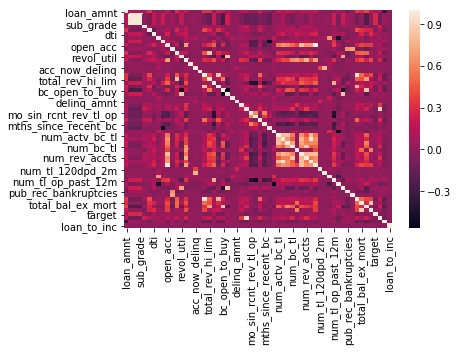

In [7]:
sns.heatmap(corr)

In [12]:
data = [go.Heatmap(z=train[:1000].values.tolist(), colorscale='Viridis')]
iplot(data)

# Data Basic Information.

In [3]:
# imbalanced dataset
target1 = train['target'].sum()
target0 = (1 - train['target']).sum()

print('Target 0:\t', target0, '\t', np.round(target0 / len(train), 4))
print('Target 1:\t', target1, '\t', np.round(target1 / len(train), 4))
print('0/1 Ratio:\t', np.round(target0 / target1, 4))

Target 0:	 549951 	 0.7616
Target 1:	 172191 	 0.2384
0/1 Ratio:	 3.1938


In [4]:
# visualize the target count distribution
data = [go.Bar(x=['status 0'], y=[target0], name='Status 0'), 
        go.Bar(x=['status 1'], y=[target1], name='Status 1')]
margin=go.layout.Margin(l=50, r=50, b=30, t=40, pad=4)
legend = dict(orientation='h', xanchor='auto', y=-0.2)

layout = go.Layout(title='Loan Status Count Plot', xaxis=dict(title='Loan Status'), 
                   yaxis=dict(title='Count'), autosize=False, width=700, height=400, 
                   margin=margin, legend=legend)
fig = go.Figure(data=data, layout=layout)
iplot(fig)

# Visualization

In [5]:
# define categorical and numerical features
cat_features = ['term', 'home_ownership', 'verification_status', 'purpose', 
                'title', 'addr_state', 'initial_list_status', 'application_type', 
                'grade', 'sub_grade']

num_features = ['loan_amnt', 'loan_to_inc', 'int_rate', 'installment_ratio', 'emp_length', 
                'annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths', 'open_acc', 'pub_rec', 
                'revol_bal', 'revol_util', 'total_acc', 'collections_12_mths_ex_med', 
                'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim', 
                'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util', 
                'chargeoff_within_12_mths', 'delinq_amnt', 'mo_sin_old_il_acct', 
                'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl', 
                'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_inq',
                'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl',
                'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl',
                'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m',
                'num_tl_30dpd', 'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 
                'pct_tl_nvr_dlq', 'percent_bc_gt_75', 'pub_rec_bankruptcies',
                'tax_liens', 'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit',
                'total_il_high_credit_limit', 'credit_length']

features = cat_features + num_features

# define numerical and categorical features
print('Categorical feature:\t', len(cat_features))
print('Numerical feature:\t', len(num_features))
print('Total feature:\t\t', len(features))

Categorical feature:	 10
Numerical feature:	 55
Total feature:		 65


### 2. Numerical Variables

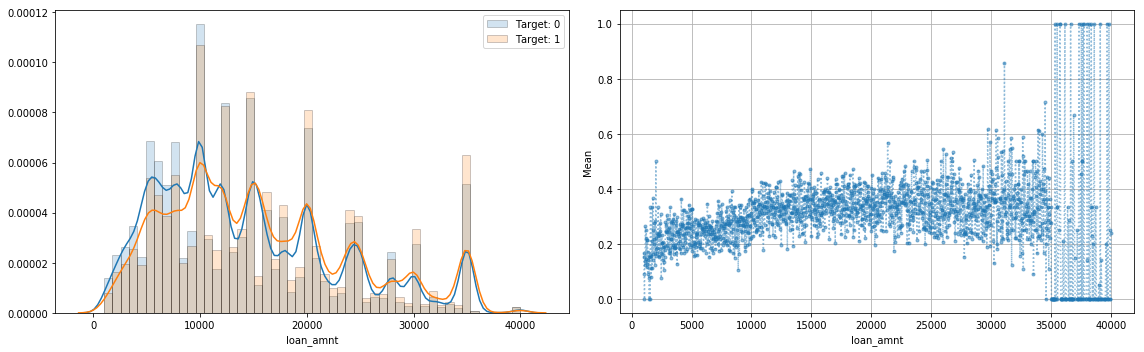

In [6]:
# loan_amnt
feature = 'loan_amnt'
fig, ax = plot_numerical(train, feature=feature, figsize=(16, 5))
plt.show()

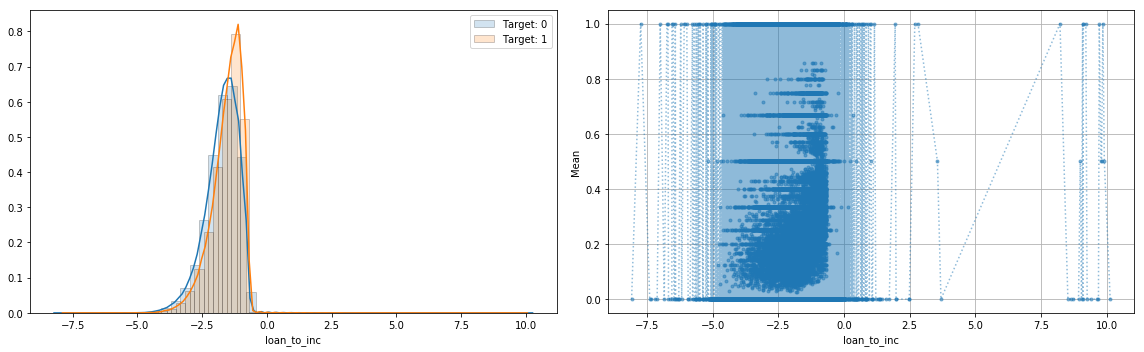

In [7]:
# loan_to_inc
feature = 'loan_to_inc'
train[feature] = np.log(train[feature])
fig, ax = plot_numerical(train, feature=feature, figsize=(16, 5))
plt.show()

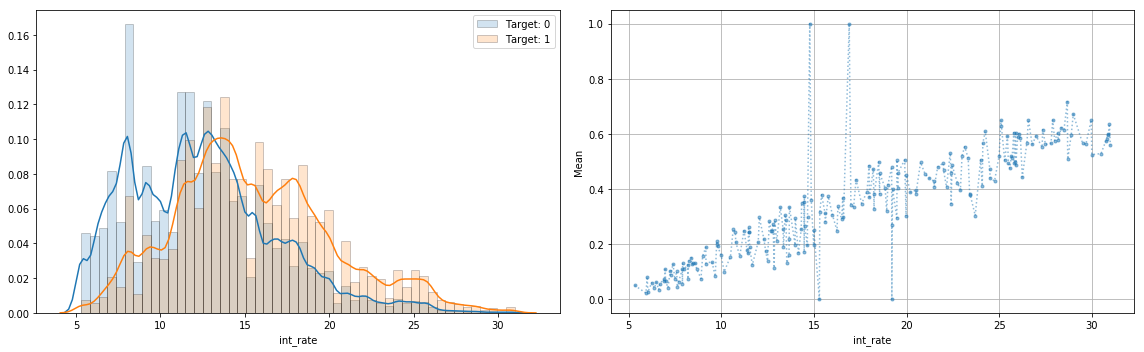

In [8]:
# int_rate
feature = 'int_rate'
fig, ax = plot_numerical(train, feature=feature, figsize=(16, 5))
plt.show()

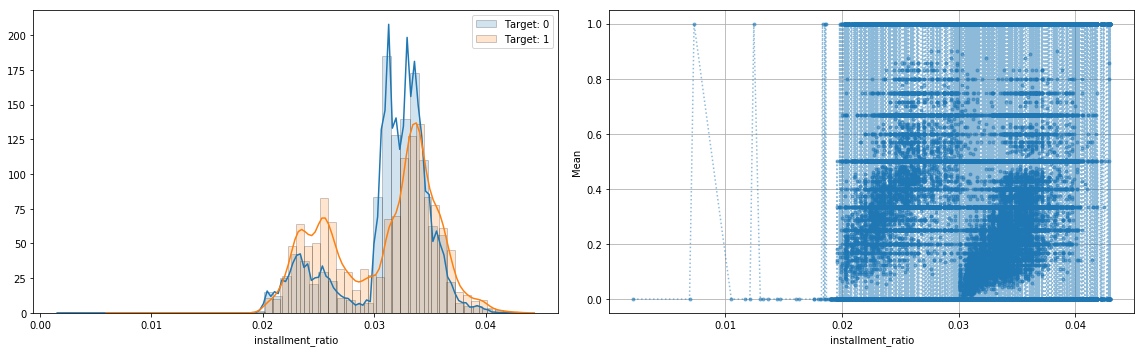

In [9]:
# installment_ratio
feature = 'installment_ratio'
fig, ax = plot_numerical(train, feature=feature, figsize=(16, 5))
plt.show()

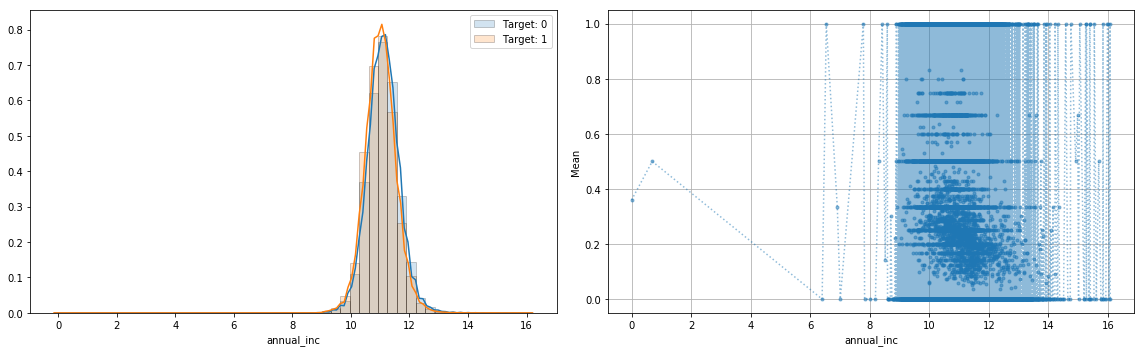

In [10]:
# annual_inc
feature = 'annual_inc'
train[feature] = np.log(train[feature] + 1)
fig, ax = plot_numerical(train, feature=feature, figsize=(16, 5))
plt.show()

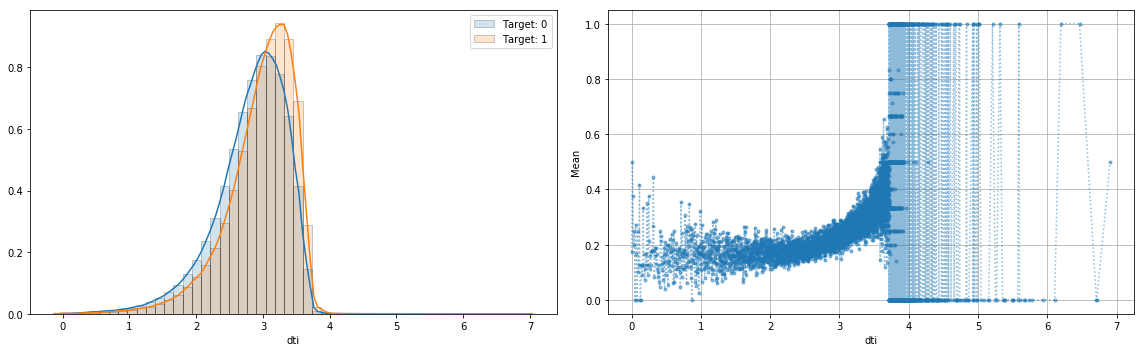

In [11]:
# dti
feature = 'dti'
train[feature] = np.log(train[feature] + 1)
fig, ax = plot_numerical(train, feature=feature, figsize=(16, 5))
plt.show()

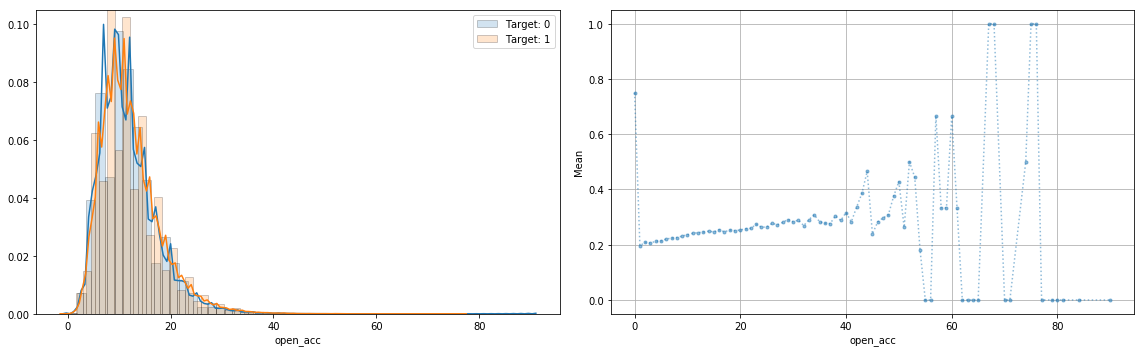

In [12]:
# open_acc
feature = 'open_acc'
fig, ax = plot_numerical(train, feature=feature, figsize=(16, 5))
plt.show()

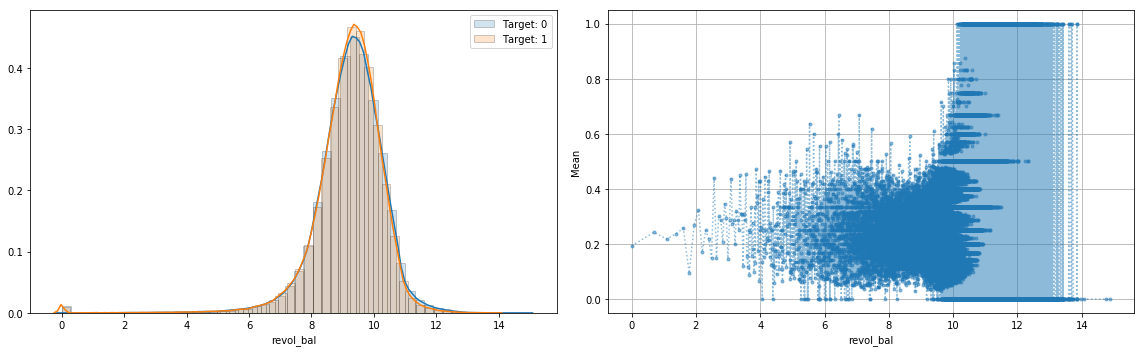

In [13]:
# revol_bal
feature = 'revol_bal'
train[feature] = np.log(train[feature] + 1)
fig, ax = plot_numerical(train, feature=feature, figsize=(16, 5))
plt.show()

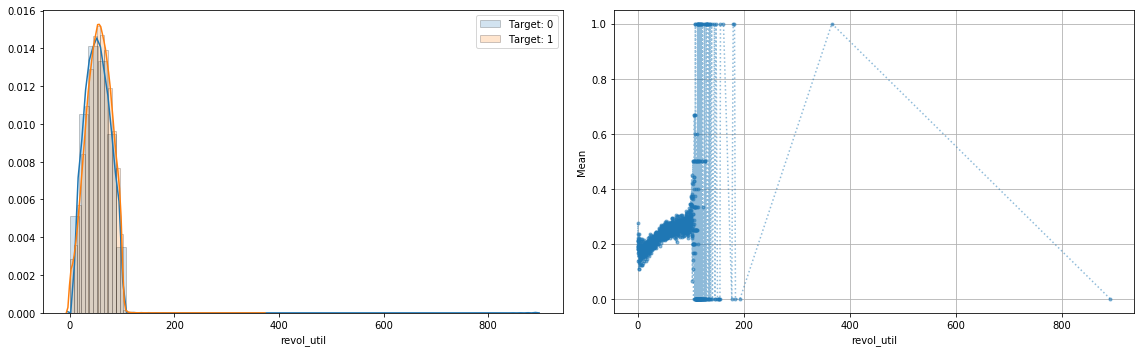

In [14]:
# revol_util
feature = 'revol_util'
fig, ax = plot_numerical(train, feature=feature, figsize=(16, 5))
plt.show()

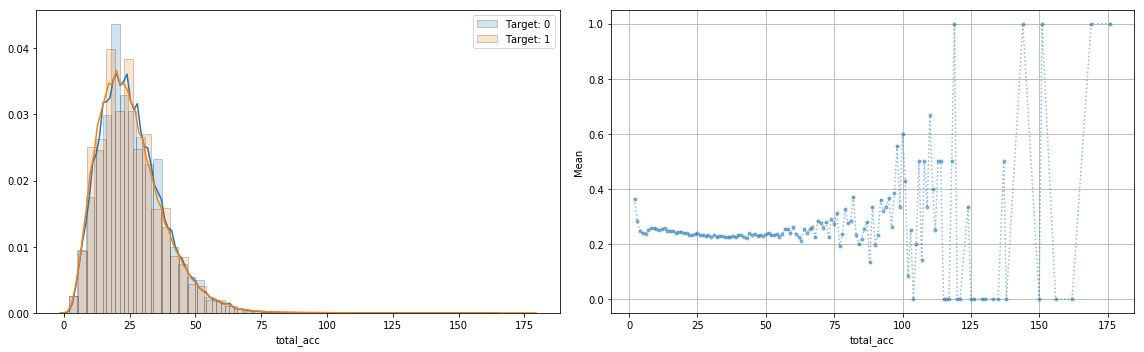

In [15]:
# total_acc
feature = 'total_acc'
fig, ax = plot_numerical(train, feature=feature, figsize=(16, 5))
plt.show()

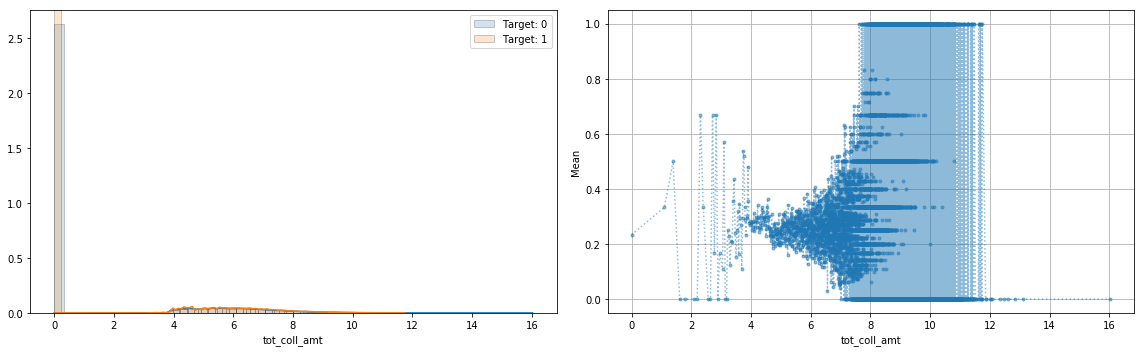

In [16]:
# tot_coll_amt
feature = 'tot_coll_amt'
train[feature] = np.log(train[feature] + 1)
fig, ax = plot_numerical(train, feature=feature, figsize=(16, 5))
plt.show()

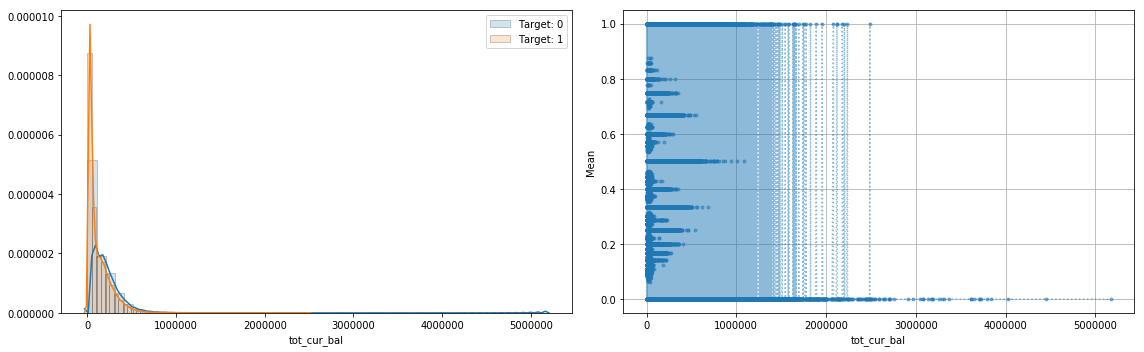

In [17]:
# tot_cur_bal
feature = 'tot_cur_bal'
fig, ax = plot_numerical(train, feature=feature, figsize=(16, 5))
plt.show()

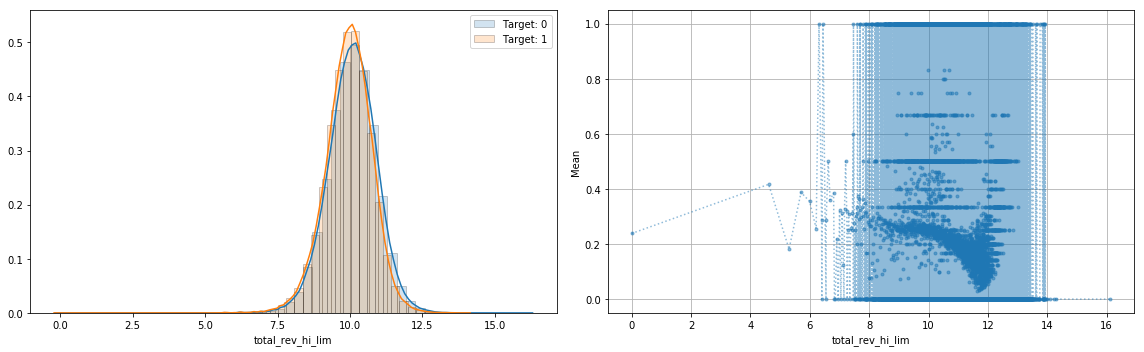

In [18]:
# total_rev_hi_lim
feature = 'total_rev_hi_lim'
train[feature] = np.log(train[feature] + 1)
fig, ax = plot_numerical(train, feature=feature, figsize=(16, 5))
plt.show()

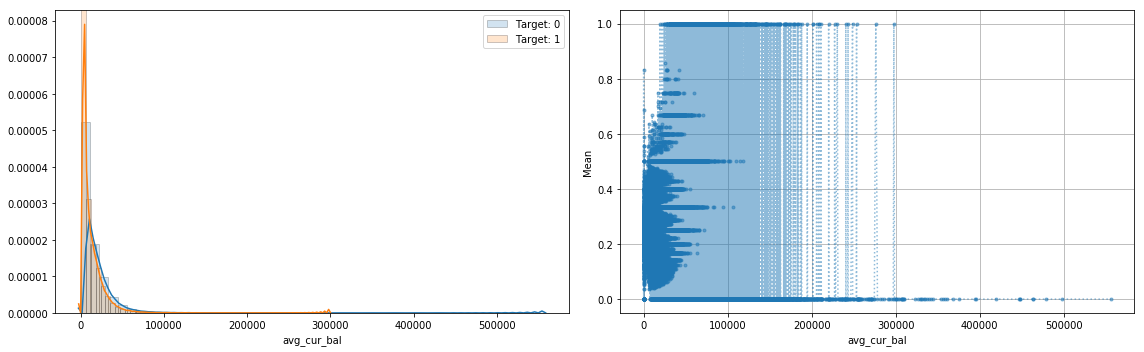

In [19]:
# avg_cur_bal
feature = 'avg_cur_bal'
fig, ax = plot_numerical(train, feature=feature, figsize=(16, 5))
plt.show()

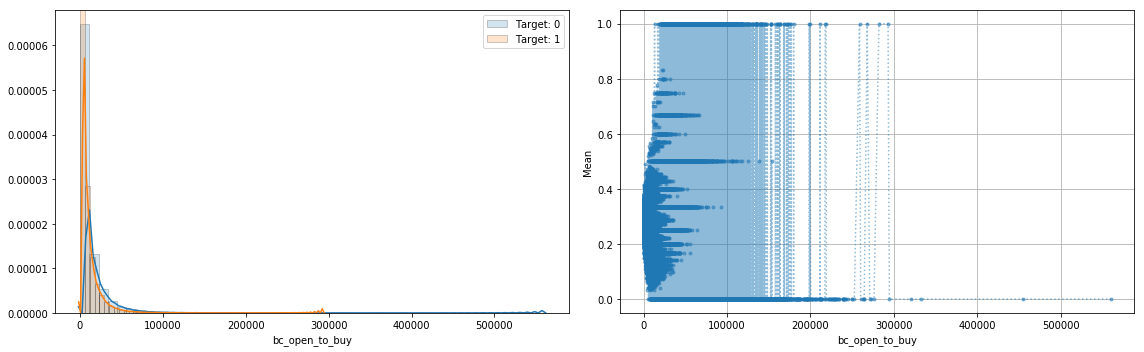

In [20]:
# bc_open_to_buy
feature = 'bc_open_to_buy'
fig, ax = plot_numerical(train, feature=feature, figsize=(16, 5))
plt.show()

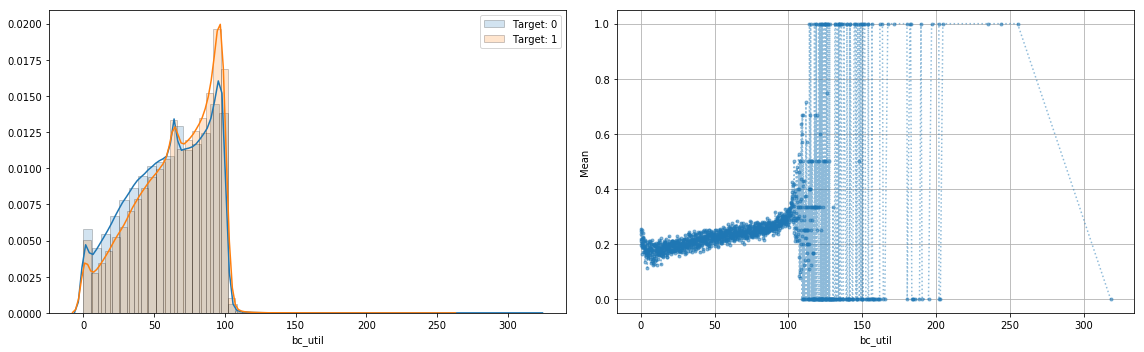

In [21]:
# bc_util
feature = 'bc_util'
fig, ax = plot_numerical(train, feature=feature, figsize=(16, 5))
plt.show()

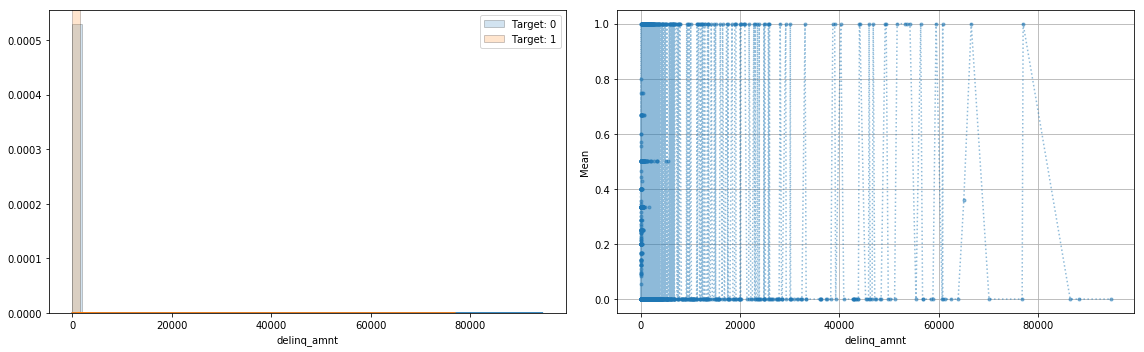

In [22]:
# delinq_amnt
feature = 'delinq_amnt'
fig, ax = plot_numerical(train, feature=feature, figsize=(16, 5))
plt.show()

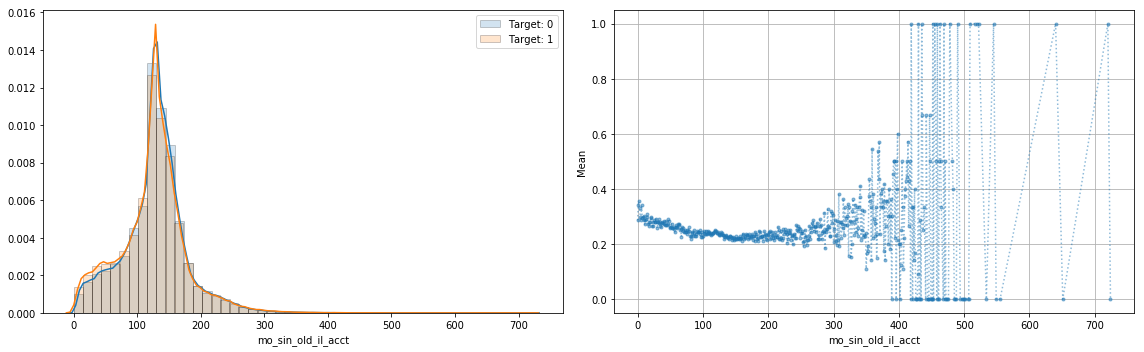

In [23]:
# mo_sin_old_il_acct
feature = 'mo_sin_old_il_acct'
fig, ax = plot_numerical(train, feature=feature, figsize=(16, 5))
plt.show()

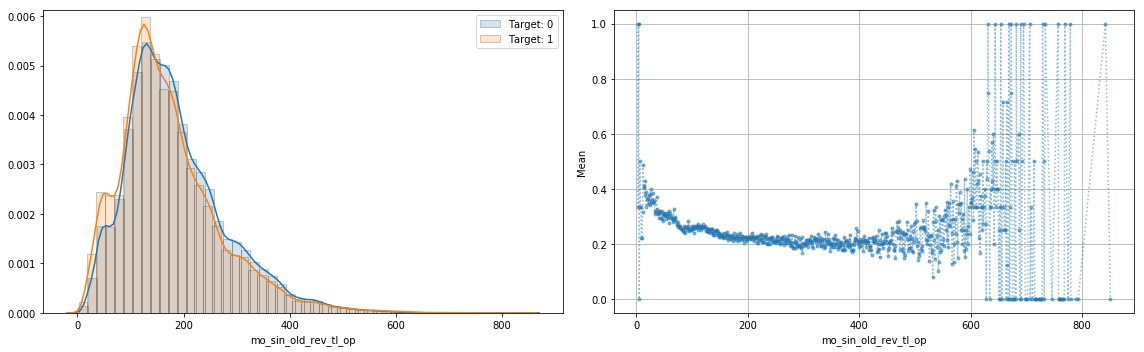

In [24]:
# mo_sin_old_rev_tl_op
feature = 'mo_sin_old_rev_tl_op'
fig, ax = plot_numerical(train, feature=feature, figsize=(16, 5))
plt.show()

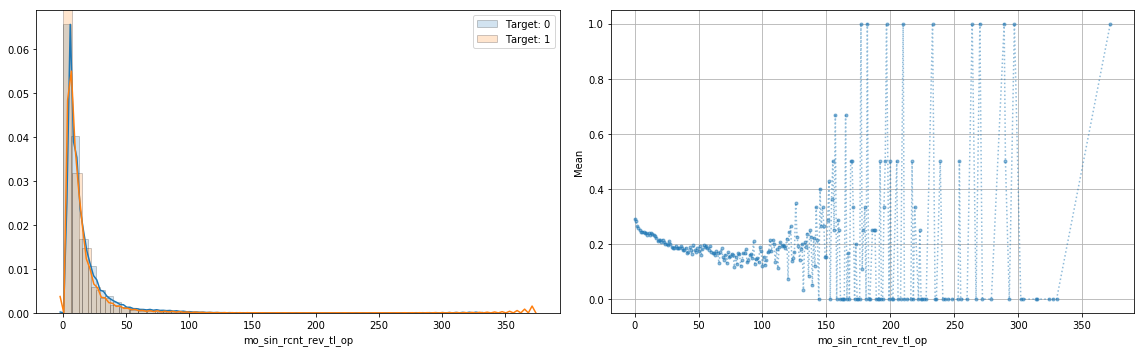

In [25]:
# mo_sin_rcnt_rev_tl_op
feature = 'mo_sin_rcnt_rev_tl_op'
fig, ax = plot_numerical(train, feature=feature, figsize=(16, 5))
plt.show()

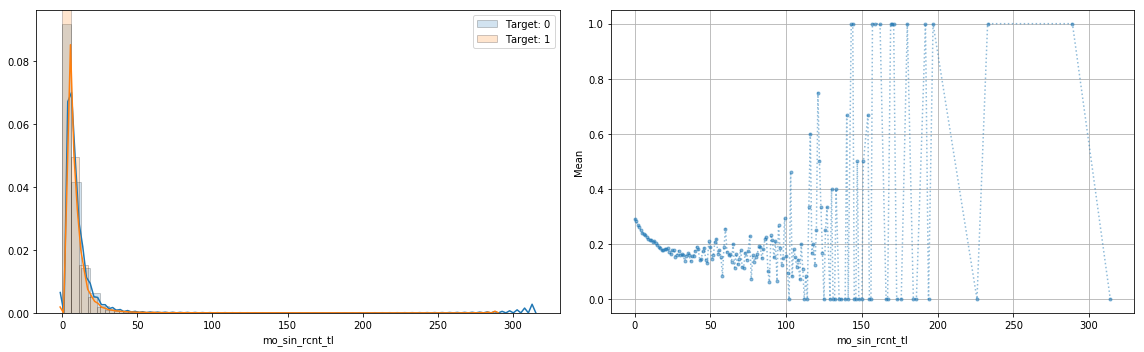

In [26]:
# mo_sin_rcnt_tl
feature = 'mo_sin_rcnt_tl'
fig, ax = plot_numerical(train, feature=feature, figsize=(16, 5))
plt.show()

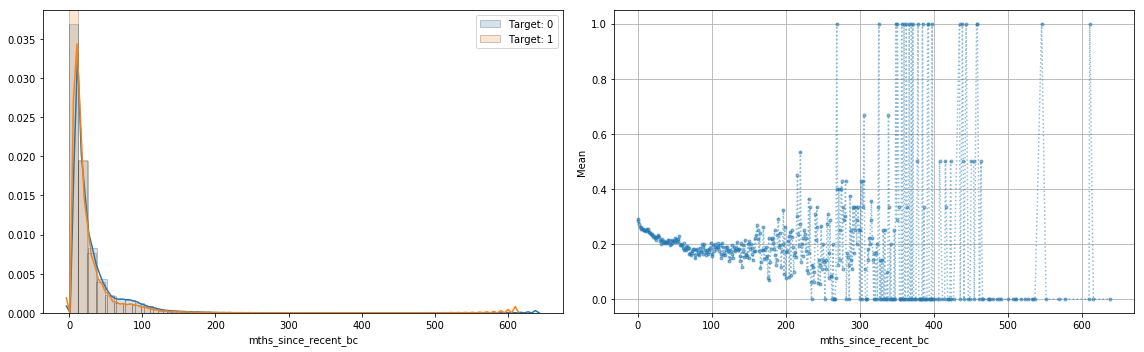

In [27]:
# mths_since_recent_bc
feature = 'mths_since_recent_bc'
fig, ax = plot_numerical(train, feature=feature, figsize=(16, 5))
plt.show()

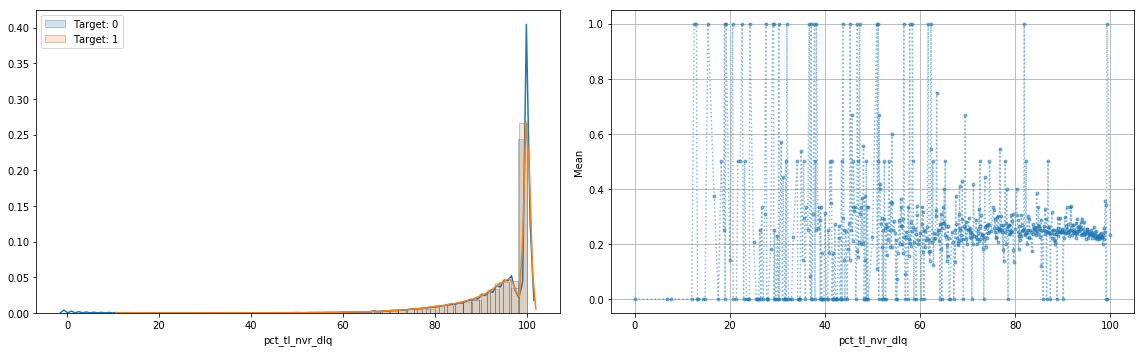

In [28]:
# pct_tl_nvr_dlq
feature = 'pct_tl_nvr_dlq'
fig, ax = plot_numerical(train, feature=feature, figsize=(16, 5))
plt.show()

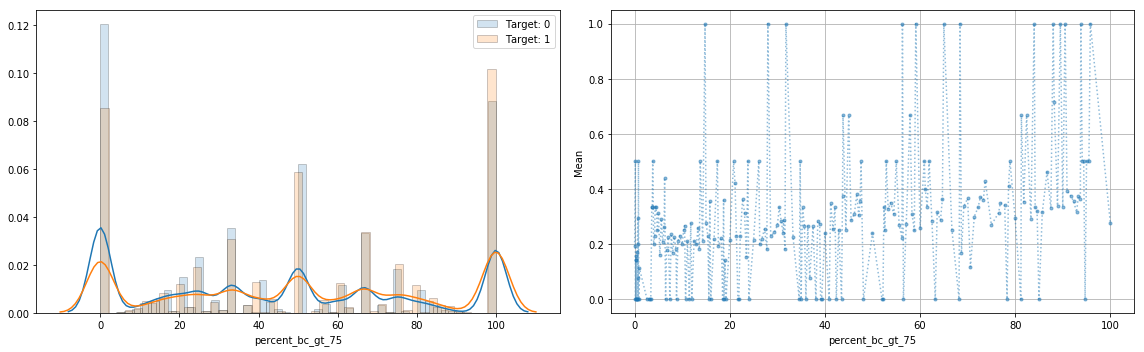

In [29]:
# percent_bc_gt_75
feature = 'percent_bc_gt_75'
fig, ax = plot_numerical(train, feature=feature, figsize=(16, 5))
plt.show()

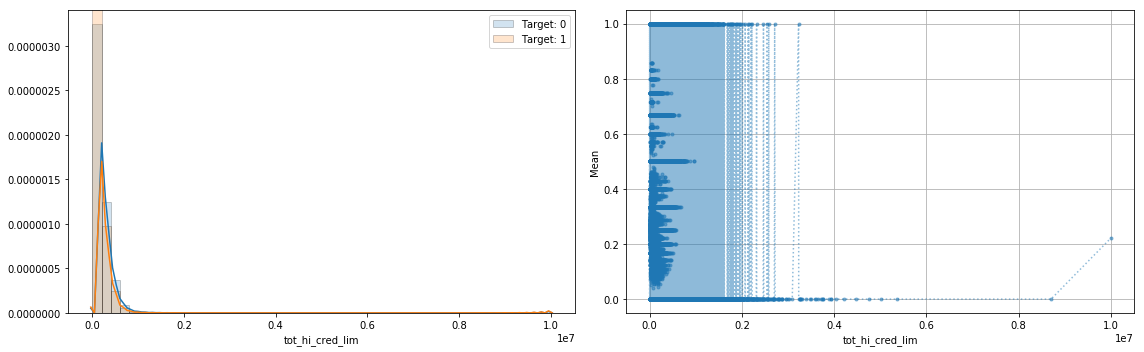

In [30]:
# tot_hi_cred_lim
feature = 'tot_hi_cred_lim'
fig, ax = plot_numerical(train, feature=feature, figsize=(16, 5))
plt.show()

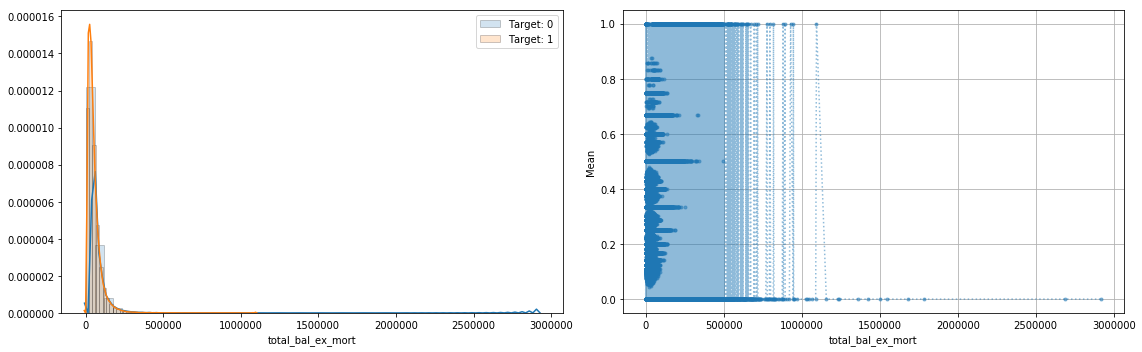

In [31]:
# total_bal_ex_mort
feature = 'total_bal_ex_mort'
fig, ax = plot_numerical(train, feature=feature, figsize=(16, 5))
plt.show()

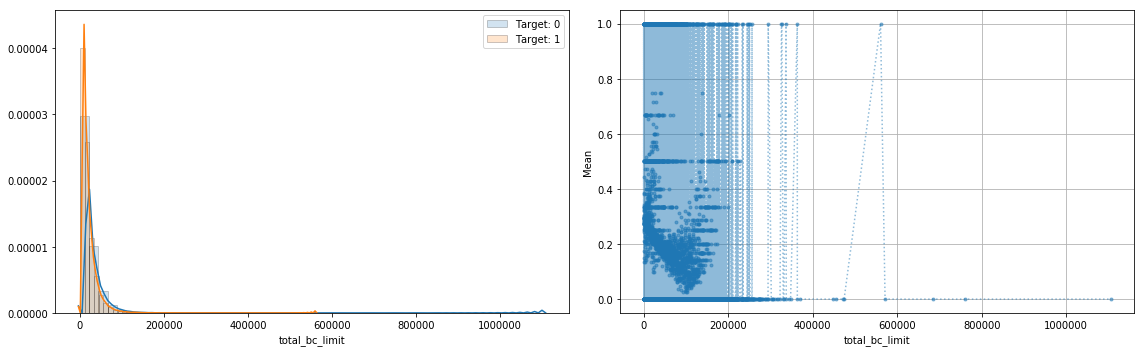

In [32]:
# total_bc_limit
feature = 'total_bc_limit'
fig, ax = plot_numerical(train, feature=feature, figsize=(16, 5))
plt.show()

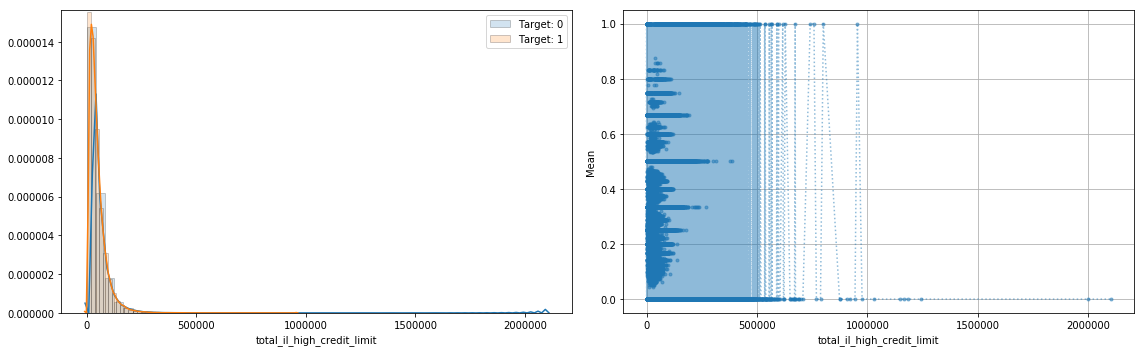

In [33]:
# total_il_high_credit_limit
feature = 'total_il_high_credit_limit'
fig, ax = plot_numerical(train, feature=feature, figsize=(16, 5))
plt.show()